In [91]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,precision_score, confusion_matrix,classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [28]:
# loading the data from csv file to a pandas Dataframe
smoking_data=pd.read_csv('/content/smoking_cancer_risk.csv')

In [29]:
smoking_data.head()

,Age,Gender,Smokes,CigarettesPerDay,YearsSmoking,AlcoholIntake,ExerciseLevel,CoughingLevel,ShortnessOfBreath,CancerRisk
0,58,Female,1,27,16,0,4,8,4,1
1,71,Female,1,38,17,8,4,3,1,1
2,48,Male,1,21,28,8,0,7,3,1
3,34,Female,1,16,19,7,3,5,8,1
4,62,Male,1,33,26,7,4,2,3,1


In [30]:
smoking_data['CancerRisk'].value_counts()

,count
CancerRisk,
1,506
0,494


In [31]:
smoking_data.isnull().sum()

,0
Age,0
Gender,0
Smokes,0
CigarettesPerDay,0
YearsSmoking,0
AlcoholIntake,0
ExerciseLevel,0
CoughingLevel,0
ShortnessOfBreath,0
CancerRisk,0


In [32]:
smoking_data.shape

(1000, 10)

In [96]:
smoking_data['Gender'] = smoking_data['Gender'].map({'Male': 1, 'Female': 0})


CANCER RISK
LOW--0
HIGH--1

In [35]:
X=smoking_data.drop(['CancerRisk'],axis=1)
Y=smoking_data['CancerRisk']

In [97]:
X

,Age,Smokes,CigarettesPerDay,YearsSmoking,AlcoholIntake,ExerciseLevel,CoughingLevel,ShortnessOfBreath,Gender_Male
0,58,1,27,16,0,4,8,4,False
1,71,1,38,17,8,4,3,1,False
2,48,1,21,28,8,0,7,3,True
3,34,1,16,19,7,3,5,8,False
4,62,1,33,26,7,4,2,3,True
...,...,...,...,...,...,...,...,...,...
995,23,0,34,34,4,0,0,5,True
996,20,1,38,10,8,0,2,8,True
997,68,1,26,33,4,0,5,7,False
998,59,1,25,15,9,4,2,6,True


In [98]:
Y

,CancerRisk
0,1
1,1
2,1
3,1
4,1
...,...
995,0
996,1
997,1
998,1


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 9) (800, 9) (200, 9)


In [50]:
model=LogisticRegression()

In [53]:
# training the model with X_train
model.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [55]:
print(training_data_prediction)

[0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0
 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1
 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0
 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0
 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1
 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0
 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1
 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1
 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1
 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0
 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1
 0 0 1 0 0 1 0 1 1 1 1 0 

In [67]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:

# Step 9️⃣ Make Predictions
Y_pred = model.predict(X_test)

In [74]:

# Step 🔟 Evaluate Model
print("\n✅ Model Evaluation Metrics:")
print("Accuracy:", round(accuracy_score(Y_test, Y_pred), 3))
print("Precision:", round(precision_score(Y_test, Y_pred), 3))


✅ Model Evaluation Metrics:
Accuracy: 0.735
Precision: 0.727



Confusion Matrix:
 [[75 27]
 [26 72]]


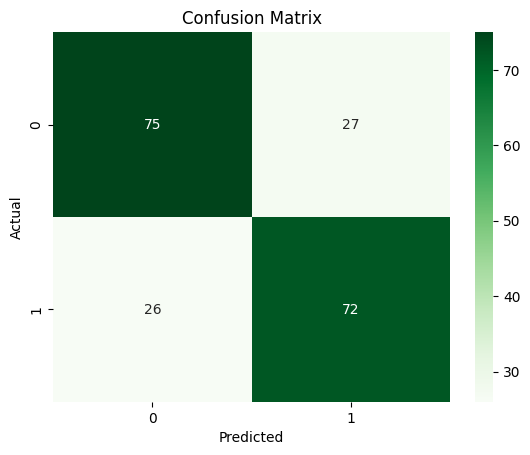

In [79]:

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [83]:


# Classification Report
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       102
           1       0.73      0.73      0.73        98

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.74      0.73      0.74       200



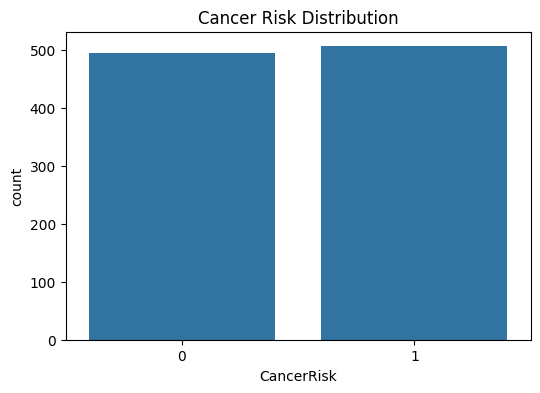

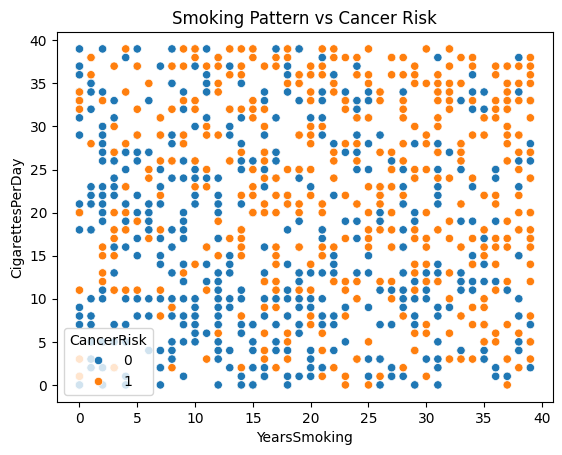

In [89]:
# Step 1️⃣2️⃣ Visualizations
plt.figure(figsize=(6,4))
sns.countplot(x='CancerRisk', data=smoking_data)
plt.title("Cancer Risk Distribution")
plt.show()

sns.scatterplot(x='YearsSmoking', y='CigarettesPerDay', hue='CancerRisk', data=smoking_data)
plt.title("Smoking Pattern vs Cancer Risk")
plt.show()

In [101]:
# Create a sample input data point with the same features as the training data
# The order of features should match the training data:
# 'Age', 'Smokes', 'CigarettesPerDay', 'YearsSmoking', 'AlcoholIntake', 'ExerciseLevel', 'CoughingLevel', 'ShortnessOfBreath', 'Gender_Male'
# Assuming 'Gender_Male' is 1 for Male and 0 for Female after one-hot encoding

# Example input data (replace with your actual new data)
input_data = [[22,0,0,38,33,5,4,9,1]]
# Convert the input data to a pandas DataFrame with the correct column names
input_df = pd.DataFrame(input_data, columns=['Age', 'Smokes', 'CigarettesPerDay', 'YearsSmoking', 'AlcoholIntake', 'ExerciseLevel', 'CoughingLevel', 'ShortnessOfBreath', 'Gender_Male'])


prediction = model.predict(input_df)
print(prediction)

if (prediction[0] == 0):
  print('The person is not at risk of cancer')
else:
  print('The person is at risk of cancer')

[1]
The person is at risk of cancer
